In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#getting the dataset of the stairs in pittsburgh

df=pd.read_csv("Stairs.csv")
df.sample(5)

,id,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
946,497251918,Leslie Park 2,Parks - Northeast,NaN,Concrete,NaN,NaN,NaN,NaN,NaN,...,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-3,40.472847,-79.958298
747,531898316,Thayer St from Tuxedo St,5th Division,NaN,Wood,67.0,51.0,0.0,100.0,506.0,...,Sheraden,2.0,20.0,42003202200,5.0,20.0,6.0,1-16,40.453198,-80.067066
718,485514511,Stella St,4th Division,NaN,Concrete,45.0,8.0,0.0,100.0,692.0,...,South Side Slopes,3.0,16.0,42003160800,3.0,16.0,3.0,4-24,40.422363,-79.968070
691,876095101,South Dallas Ave at Edgerton St to Glen Arden Dr,2nd Division,1933-01-01,Concrete,315.0,30.0,1.0,7.0,1097.0,...,Point Breeze,8.0,14.0,42003140400,3.0,14.0,4.0,2-17,40.448246,-79.911264
682,1694766052,Singer Place from Haverhill St to Singer St,2nd Division,1949-01-01,Concrete,179.0,109.0,0.0,100.0,472.0,...,East Hills,9.0,13.0,42003130600,2.0,13.0,5.0,3-17,40.453056,-79.884220


In [3]:
#making a new dataframe with only the data needed

sdf = df[['number_of_steps',"neighborhood"]]
sdf.sample(5)

,number_of_steps,neighborhood
40,3.0,Elliott
172,14.0,Spring Hill-City View
765,NaN,Sheraden
1026,NaN,Lower Lawrenceville
737,74.0,California-Kirkbride


In [4]:
#checking to see how many null data points we have

null_columns=sdf.columns[sdf.isnull().any()]
sdf[null_columns].isnull().sum()

number_of_steps    353
neighborhood         1
dtype: int64

In [5]:
#Removing the neighborhood null since we wont be able to find what neighborhood the data point belongs to 
#and checking to see how many null data points we have again

sdf = sdf.dropna(subset=['neighborhood'])
null_columns=sdf.columns[sdf.isnull().any()]
sdf[null_columns].isnull().sum()

number_of_steps    352
dtype: int64

In [6]:
#Seeing how many unique sets of stairs are counted in each neighborhood

print(sdf['neighborhood'].value_counts())

South Side Slopes    108
Mount Washington      53
Perry North           48
Beechview             42
Greenfield            40
                    ... 
Manchester             1
Glen Hazel             1
Chartiers City         1
Larimer                1
Strip District         1
Name: neighborhood, Length: 80, dtype: int64


In [7]:
#making a dataframe with the neighborhoods and unique number of sets of stairs 
#(counts for number of unique staircases instead of stairs in each neighborhood)

nsdf = sdf['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='counts')
nsdf.head()

,neighborhood,counts
0,South Side Slopes,108
1,Mount Washington,53
2,Perry North,48
3,Beechview,42
4,Greenfield,40


In [8]:
#Getting the mean number of overall steps in all neighborhoods 
#and then replacing each null value in number_of_steps col with overall mean (rounded to floor)

nosMean = sdf[["number_of_steps"]].mean()
sdf["number_of_steps"].fillna(51.0, inplace = True)

#Checking for nulls
null_columns=sdf.columns[sdf.isnull().any()]
sdf[null_columns].isnull().sum()

Series([], dtype: float64)

In [9]:
#Taking all the unique neighborhoods and adding all the stairs for each neighborhood

d = {}

for index, rows in sdf.iterrows():
    if (rows.neighborhood in d):
        d[rows.neighborhood] += rows.number_of_steps
    else:
        d[rows.neighborhood] = rows.number_of_steps

print(d)

{'South Oakland': 406.0, 'South Side Slopes': 5917.0, 'Bedford Dwellings': 387.0, 'Polish Hill': 1190.0, 'Upper Lawrenceville': 885.0, 'Stanton Heights': 825.0, 'Squirrel Hill South': 1199.0, 'Sheraden': 1754.0, 'Greenfield': 1880.0, 'West Oakland': 376.0, 'Upper Hill': 1021.0, 'Beechview': 2677.0, 'Mount Oliver Borough': 9.0, 'Allentown': 876.0, 'Elliott': 1919.0, 'Banksville': 338.0, 'Carrick': 1712.0, 'Spring Garden': 526.0, 'Marshall-Shadeland': 1451.0, 'California-Kirkbride': 744.0, 'Morningside': 333.0, 'Brookline': 1654.0, 'Troy Hill': 1370.0, 'Brighton Heights': 613.0, 'Squirrel Hill North': 405.0, 'Beltzhoover': 1003.0, 'Hazelwood': 1476.0, 'Strip District': 65.0, 'Fineview': 1276.0, 'Perry North': 2470.0, 'Central Oakland': 361.0, 'Spring Hill-City View': 1255.0, 'Knoxville': 214.0, 'Homewood North': 616.0, 'Mt. Oliver': 218.0, 'North Oakland': 72.0, 'Bon Air': 108.0, 'Middle Hill': 497.0, 'Bloomfield': 314.0, 'Crafton Heights': 580.0, 'East Allegheny': 506.0, 'Arlington': 44

In [10]:
#converting the data back into a dataframe

ssdf = pd.DataFrame(list(d.items()),columns = ['neighborhood','total_stairs'])
ssdf.head()

,neighborhood,total_stairs
0,South Oakland,406.0
1,South Side Slopes,5917.0
2,Bedford Dwellings,387.0
3,Polish Hill,1190.0
4,Upper Lawrenceville,885.0


In [11]:
#merging the # of stairs and # of unique staircases in each neighborhood into one dataframe

stairdf = pd.merge(nsdf, ssdf, on=['neighborhood'])
display(stairdf)

,neighborhood,counts,total_stairs
0,South Side Slopes,108,5917.0
1,Mount Washington,53,1831.0
2,Perry North,48,2470.0
3,Beechview,42,2677.0
4,Greenfield,40,1880.0
...,...,...,...
75,Manchester,1,51.0
76,Glen Hazel,1,108.0
77,Chartiers City,1,81.0
78,Larimer,1,93.0


In [12]:
#adding a new column that counts total_stairs/(# of unique staircases) in each neighborhood

stairdf['total_stairs/counts'] = stairdf['total_stairs']/stairdf['counts']
display(stairdf)

,neighborhood,counts,total_stairs,total_stairs/counts
0,South Side Slopes,108,5917.0,54.787037
1,Mount Washington,53,1831.0,34.547170
2,Perry North,48,2470.0,51.458333
3,Beechview,42,2677.0,63.738095
4,Greenfield,40,1880.0,47.000000
...,...,...,...,...
75,Manchester,1,51.0,51.000000
76,Glen Hazel,1,108.0,108.000000
77,Chartiers City,1,81.0,81.000000
78,Larimer,1,93.0,93.000000


In [13]:
#sorting the dataframe so it can be plotted properly 

stairdf = stairdf.sort_values('total_stairs/counts')
display(stairdf)

,neighborhood,counts,total_stairs,total_stairs/counts
60,Allegheny West,3,23.0,7.666667
73,Mount Oliver Borough,1,9.0,9.000000
61,Esplen,3,48.0,16.000000
59,North Oakland,4,72.0,18.000000
48,Allegheny Center,6,140.0,23.333333
...,...,...,...,...
78,Larimer,1,93.0,93.000000
76,Glen Hazel,1,108.0,108.000000
63,Central Northside,3,333.0,111.000000
57,East Allegheny,4,506.0,126.500000


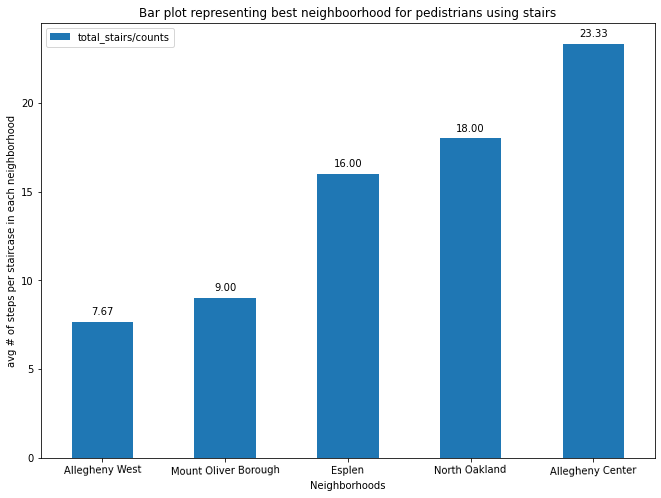

In [16]:
#First takes the sorted dataframe and takes the top 5 values
#then goes and creates the bar graph
#after that it goes and takes the exact value for each bargraph and places them ontop
#lastly it labels everything then displays it

plotdf = stairdf.sort_values('total_stairs/counts').head(5)

ax = plotdf.plot(x ='neighborhood', y='total_stairs/counts', kind = 'bar', rot=1, figsize=(11, 8))

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    #Source for the code to get the values ontop of the bar graphs: https://stackoverflow.com/questions/23591254/python-pandas-matplotlib-annotating-labels-above-bar-chart-columns
    
    
plt.title("Bar plot representing best neighboorhood for pedistrians using stairs")
plt.ylabel('avg # of steps per staircase in each neighborhood')
plt.xlabel('Neighborhoods')

plt.show()

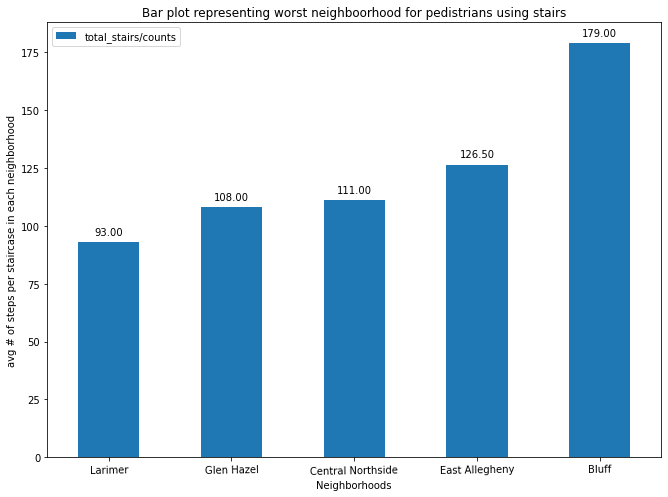

In [15]:
#same as before but just did tail(5) for the worst instead

plotdf = stairdf.sort_values('total_stairs/counts').tail(5)

ax = plotdf.plot(x ='neighborhood', y='total_stairs/counts', kind = 'bar', rot=1, figsize=(11, 8))

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
 
plt.title("Bar plot representing worst neighboorhood for pedistrians using stairs")
plt.ylabel('avg # of steps per staircase in each neighborhood')
plt.xlabel('Neighborhoods')

plt.show()